In [2]:
from scipy import signal


import librosa
import matplotlib.pyplot as plt

import numpy as np
from scipy import fftpack
from ipywidgets import interact, interactive, fixed, interact_manual,FloatSlider
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from IPython.display import (
    Audio, display, clear_output)

## our question signal

In [2]:
t = np.linspace(-1.25, 1.25, 1000, endpoint=True)

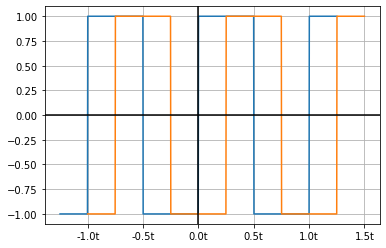

In [3]:
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1ft'))
ax.plot(t, signal.square(2 * np.pi  *t))
ax.plot(t+0.25, signal.square(2 * np.pi  *t))
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')


## the signal fourier transform and reversed fourier transform

<class 'float'>


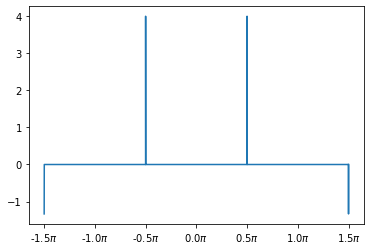

In [4]:
T = np.pi                      # time distance between pulses
Fs = 10000                  # sampling frequency, used for discretizing the system
t = np.arange(-6*np.pi/4, 6*np.pi/4, 1/Fs) # time range to consider
comb = np.zeros_like(t)
print(type(Fs*T))
fig, ax = plt.subplots()
comb[int(Fs*T):int(2*Fs*T):int(Fs*T)] = 4     # Comb becomes T every T*Fs samples
comb[:int(3*Fs*T):int(3*Fs*T-1)] = -4/3 
plt.plot(t/np.pi, comb)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f$\pi$'))
squr = np.fft.irfft(comb)
x=np.linspace(-1.25,1.25,len(squr))

In [5]:
squr.real

array([ 6.36625038e-05,  7.07606194e-06, -6.36641373e-05, ...,
        7.07361118e-06, -6.36641373e-05,  7.07606194e-06])

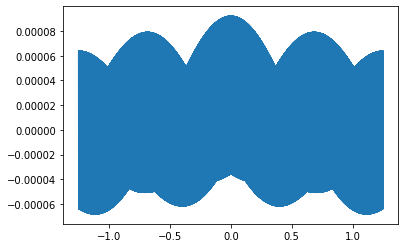

In [6]:
plt.plot(x,squr.real)


## trying something simple, cos fourier transform

<IPython.core.display.Javascript object>


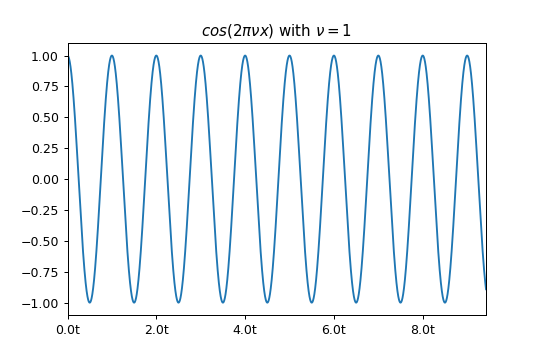

<IPython.core.display.Javascript object>


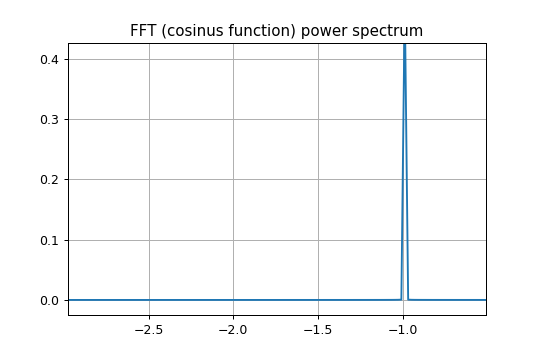

In [109]:
%matplotlib notebook
N = 50000 # Number of samplepoints

T = 1.0 / 1000.0 # sample spacing

x = np.linspace(0.0, N*T, N)

y = np.cos(2.0*np.pi*x)
fig, ax = plt.subplots()
plt.plot(x,y)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1ft'))
plt.xlim(0,3.0*np.pi)

plt.title(r'$cos(2\pi \nu x)$ with $\nu=1$')


yf = fftpack.fft(y)

yf = np.fft.fftshift(yf)

xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)  #can't figure out the meaning of this constants

fig, ax = plt.subplots()

ax.plot(xf, 1.0/N *np.abs(yf) )

plt.xlim(-4,4)
plt.title('FFT (cosinus function) power spectrum')
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f$\pi$'))
plt.grid()

## this example doesn't really work

600


<IPython.core.display.Javascript object>


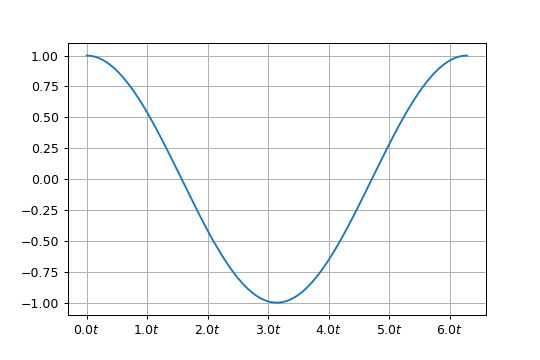

<IPython.core.display.Javascript object>


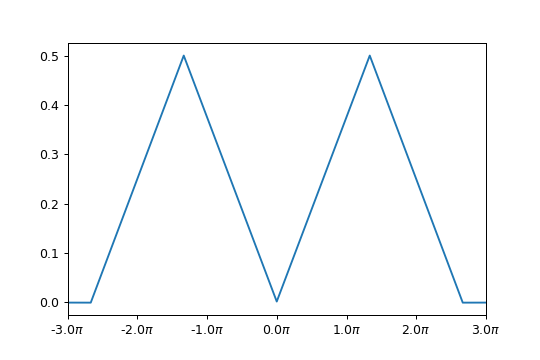

d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-3, 3)

In [108]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0, 2*np.pi, N)
print(len(x))
fig, ax = plt.subplots()
y = np.cos(x)
plt.plot(x,y)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f$t$'))
ax.grid(True)

yf = np.fft.fft(y)
yf = np.fft.fftshift(yf)
xf = np.fft.fftfreq(N, T)

xf = np.fft.fftshift(xf)

freq = np.fft.fftfreq(N)

fig, ax = plt.subplots()
ax.plot(xf,yf/N)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f$\pi$'))
plt.xlim(-3,3)

[-1.25      -1.2489996 -1.2479992 ...  1.2479992  1.2489996  1.25     ]


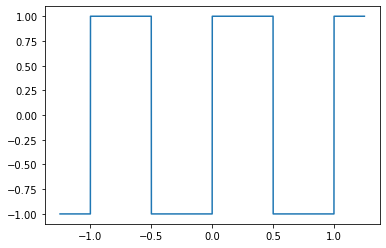

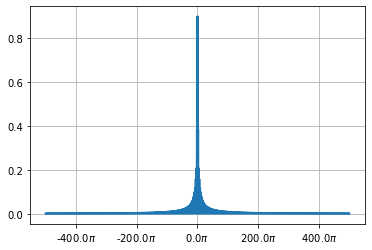

In [9]:
N = 1000*1.25 # Number of samplepoints

T = 1.0 / 1000.0 # sample spacing

x = np.linspace(-N*T, N*T,2*N)
print(x)
y =signal.square(2 * np.pi  *x)

plt.plot(x,y)

plt.show()

yf = scipy.fftpack.fft(y)

yf = np.fft.fftshift(yf)

xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), 2*N)

fig, ax = plt.subplots()

ax.plot(xf, 1.0/N *np.abs(yf) )
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f$\pi$'))

plt.grid()

<IPython.core.display.Javascript object>


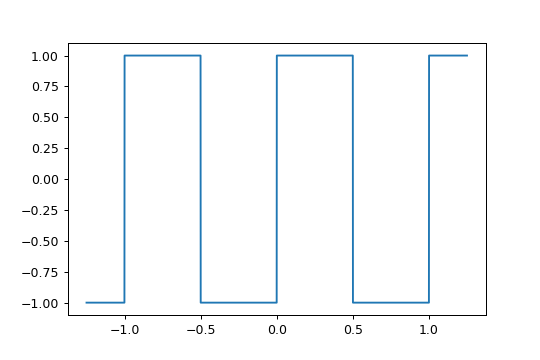

[ 0.          0.79936051  1.59872102 ... -2.39808153 -1.59872102
 -0.79936051]


<IPython.core.display.Javascript object>


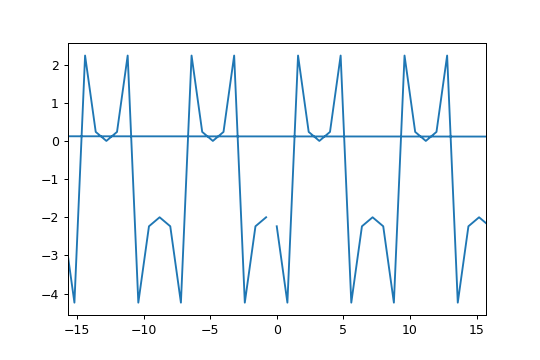

[-0.99830557 -3.39287981  1.00058312 ... -2.12032913 -1.00039426
  3.39467072]


d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [82]:
%matplotlib notebook
f=1
T = 1.0 / 1000.0 # sample spacing
N=1250
t = np.linspace(-N*T,N*T,2*N)
sqwave = np.sign(np.sin(2*np.pi*f*t)) 
plt.plot(t,sqwave)

yf = np.fft.rfft(sqwave)

yf = np.fft.fftshift(yf)
freq = np.fft.fftfreq(len(yf))/T
print(freq)
fig, ax = plt.subplots()
plt.xlim(-10*np.pi/2,10*np.pi/2)
ax.plot(freq, yf)
#
yf=np.fft.irfft(yf)
print(yf)
xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N*2)  #can't figure out the meaning of this constants
#xf=np.arange(len(yf))




## fourier series example

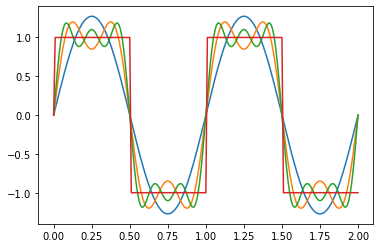

In [3]:
t = np.linspace(0,2,201) #two cycles, 100 points each
f=1
y1 = (4/np.pi)*np.sin(2*np.pi*f*t)
y3 = y1 + (4/(3*np.pi))*np.sin(2*np.pi*3*f*t)
y5 = y3 + (4/(5*np.pi))*np.sin(2*np.pi*5*f*t)
sqwave = np.sign(np.sin(2*np.pi*f*t)) #an actual square wave
plt.plot(t,y1, t,y3, t,y5, t, sqwave)

In [10]:
@interact_manual
def fs(n=""):
    n = int(n)
    print(np.arange(1,n,2))
    sq = np.zeros(len(t)) #preallocate the output array
    for h in np.arange(1,n,2):
        sq += (4/(np.pi*h))*np.sin(2*np.pi*f*h*t)
    fig, ax = plt.subplots()
    ax.plot(t,sq, t,sqwave)


interactive(children=(Text(value='', description='n'), Button(description='Run Interact', style=ButtonStyle())…

[0.00000000e+00 1.00006929e-03 2.00013857e-03 ... 2.51307411e+01
 2.51317412e+01 2.51327412e+01]


<IPython.core.display.Javascript object>


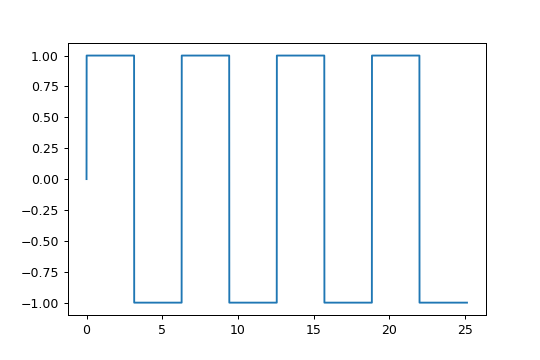

0j
(1+2.4492935982947064e-16j)
(1+4.898587196589413e-16j)
(1+7.347880794884119e-16j)
(1+9.797174393178826e-16j)
(1+1.2246467991473533e-15j)
(1+1.4695761589768238e-15j)
(1+1.7145055188062944e-15j)
(1+1.959434878635765e-15j)
(1+2.204364238465236e-15j)
(1+2.4492935982947065e-15j)
(1+9.799650315725178e-15j)
(1+2.9391523179536475e-15j)
(1-3.921345679817883e-15j)
(1+3.429011037612589e-15j)
(1+1.0779367755043061e-14j)
(1+3.91886975727153e-15j)
(1-2.941628240500001e-15j)
(1+4.408728476930472e-15j)
(1+1.1759085194360944e-14j)
(1+4.898587196589413e-15j)
(1-1.9619108011821185e-15j)
(1+1.9599300631450357e-14j)
(1+1.2738802633678827e-14j)
(1+5.878304635907295e-15j)
(1-9.82193361864236e-16j)
(1-7.842691359635767e-15j)
(1+1.371852007299671e-14j)
(1+6.858022075225178e-15j)
(1-2.475922546353431e-18j)
(1+2.1558735510086122e-14j)
(1+1.469823751231459e-14j)
(1+7.83773951454306e-15j)
(1+9.772415167715292e-16j)
(1-5.883256481000002e-15j)
(1+1.5677954951632475e-14j)
(1+8.817456953860943e-15j)
(1+1.9569589560

(1-8.636369001275487e-14j)
(1+1.0720658986360379e-12j)
(1+4.115060837389742e-13j)
(1-2.490537311580895e-13j)
(1+9.093758574907033e-13j)
(1+2.4881604259363955e-13j)
(1-4.1174377230342415e-13j)
(1+7.466858163453686e-13j)
(1+8.612600144830495e-14j)
(1+1.2445555900970977e-12j)
(1+5.83995775200034e-13j)
(1-7.656403969702969e-14j)
(1+1.081865548951763e-12j)
(1+4.2130573405469936e-13j)
(1-2.3925408084236434e-13j)
(1+9.191755078064285e-13j)
(1+2.5861569290936473e-13j)
(1-4.0194412198769897e-13j)
(1+7.564854666610938e-13j)
(1+9.592565176403012e-14j)
(1+1.2543552404128228e-12j)
(1+5.937954255157592e-13j)
(1-6.676438938130451e-14j)
(1+1.0916651992674883e-12j)
(1+4.3110538437042454e-13j)
(1-2.2945443052663917e-13j)
(1+9.289751581221537e-13j)
(1+2.6841534322508995e-13j)
(1-3.9214447167197375e-13j)
(1+7.66285116976819e-13j)
(1+1.057253020797553e-13j)
(1-5.548345128173084e-13j)
(1+6.035950758314844e-13j)
(1-5.696473906557934e-14j)
(1+1.1014648495832135e-12j)
(1+4.4090503468614976e-13j)
(1-2.196547802

(1-2.1184675176692715e-13j)
(1+9.465828368818657e-13j)
(1+2.860230219848019e-13j)
(1-3.745367929122618e-13j)
(1+7.83892795736531e-13j)
(1+1.233329808394673e-13j)
(1+1.2817625694882602e-12j)
(1+6.212027545911964e-13j)
(1-3.935706030586734e-14j)
(1+1.1190725283429255e-12j)
(1+4.585127134458617e-13j)
(1-2.0204710145120198e-13j)
(1+9.563824871975908e-13j)
(1+2.958226723005271e-13j)
(1-3.647371425965366e-13j)
(1+7.936924460522562e-13j)
(1+1.3313263115519246e-13j)
(1+1.2915622198039853e-12j)
(1+6.310024049069215e-13j)
(1-2.9557409990142156e-14j)
(1+1.1288721786586506e-12j)
(1+4.68312363761587e-13j)
(1-1.9224745113547678e-13j)
(1+9.66182137513316e-13j)
(1+3.0562232261625227e-13j)
(1-3.5493749228081143e-13j)
(1+8.034920963679813e-13j)
(1+1.4293228147091766e-13j)
(1+1.3013618701197104e-12j)
(1+6.408020552226468e-13j)
(1-1.9757759674416978e-14j)
(1+1.1386718289743757e-12j)
(1+4.781120140773121e-13j)
(1-1.824478008197516e-13j)
(1+9.759817878290412e-13j)
(1+3.1542197293197745e-13j)
(1-3.4513784196

(1+1.7305548621398799e-12j)
(1+1.0699950472428162e-12j)
(1+4.0943523234575253e-13j)
(1-2.5112458255131117e-13j)
(1-9.11684397448375e-13j)
(1+2.0657345947462744e-12j)
(1+1.4051747798492107e-12j)
(1+7.44614964952147e-13j)
(1+8.405515005508327e-14j)
(1-5.765046648419804e-13j)
(1+2.4009143273526687e-12j)
(1+1.7403545124556052e-12j)
(1+1.0797946975585414e-12j)
(1+4.192348826614777e-13j)
(1-2.41324932235586e-13j)
(1-9.018847471326497e-13j)
(1+2.0755342450619997e-12j)
(1+1.4149744301649358e-12j)
(1+7.544146152678722e-13j)
(1+9.385480037080845e-14j)
(1-5.667050145262552e-13j)
(1+2.410713977668394e-12j)
(1+1.7501541627713303e-12j)
(1+1.0895943478742667e-12j)
(1+4.290345329772029e-13j)
(1-2.315252819198608e-13j)
(1-8.920850968169245e-13j)
(1+2.0853338953777246e-12j)
(1+1.424774080480661e-12j)
(1+7.642142655835973e-13j)
(1+1.0365445068653363e-13j)
(1-5.569053642105301e-13j)
(1+2.4205136279841193e-12j)
(1+1.7599538130870555e-12j)
(1+1.0993939981899918e-12j)
(1+4.3883418329292806e-13j)
(1-2.2172563

(-1-6.13236267104243e-13j)
(-1+4.732354779282077e-14j)
(-1+7.078833626898844e-13j)
(-1-2.269535629504765e-12j)
(-1-1.6089758146077011e-12j)
(-1-9.484159997106375e-13j)
(-1-2.8785618481357366e-13j)
(-1+3.7270363008349004e-13j)
(-1-2.6047153621111593e-12j)
(-1-1.9441555472140956e-12j)
(-1-1.2835957323170318e-12j)
(-1-6.230359174199681e-13j)
(-1+3.7523897477095597e-14j)
(-1+6.980837123741593e-13j)
(-1-2.27933527982049e-12j)
(-1-1.6187754649234262e-12j)
(-1-9.582156500263626e-13j)
(-1-2.9765583512929884e-13j)
(-1+3.6290397976776487e-13j)
(-1-2.6145150124268846e-12j)
(-1-1.9539551975298205e-12j)
(-1-1.293395382632757e-12j)
(-1-6.328355677356933e-13j)
(-1+2.7724247161370415e-14j)
(-1+6.882840620584341e-13j)
(-1-2.2891349301362152e-12j)
(-1-1.6285751152391514e-12j)
(-1-9.680153003420877e-13j)
(-1-3.07455485445024e-13j)
(-1+3.531043294520397e-13j)
(-1-2.6243146627426095e-12j)
(-1-1.963754847845546e-12j)
(-1-1.3031950329484822e-12j)
(-1-6.426352180514184e-13j)
(-1+1.7924596845645237e-14j)
(-1+6

(-1+4.374763975930562e-13j)
(-1-2.5399425946015932e-12j)
(-1-1.8793827797045296e-12j)
(-1-1.2188229648074657e-12j)
(-1-5.582631499104019e-13j)
(-1+1.0229666498666174e-13j)
(-1-2.8751223272079875e-12j)
(-1-2.214562512310924e-12j)
(-1-1.5540026974138602e-12j)
(-1-8.934428825167964e-13j)
(-1-2.328830676197327e-13j)
(-1+4.27676747277331e-13j)
(-1-2.549742244917318e-12j)
(-1-1.8891824300202545e-12j)
(-1-1.2286226151231908e-12j)
(-1-5.680628002261272e-13j)
(-1+9.249701467093657e-14j)
(-1+7.530568295680002e-13j)
(-1-2.224362162626649e-12j)
(-1-1.5638023477295853e-12j)
(-1-9.032425328325216e-13j)
(-1-2.4268271793545786e-13j)
(-1+4.1787709696160584e-13j)
(-1-2.5595418952330435e-12j)
(-1-1.89898208033598e-12j)
(-1-1.238422265438916e-12j)
(-1-5.778624505418523e-13j)
(-1+8.269736435521139e-14j)
(-1+7.432571792522751e-13j)
(-1-2.234161812942374e-12j)
(-1-1.5736019980453104e-12j)
(-1-9.130421831482468e-13j)
(-1-2.5248236825118303e-13j)
(-1+4.0807744664588067e-13j)
(-1-2.5693415455487688e-12j)
(-1-1.

(-1-2.3399663445436126e-12j)
(-1-1.679406529646549e-12j)
(-1-1.0188467147494853e-12j)
(-1-3.582868998524217e-13j)
(-1+3.02272915044642e-13j)
(-1-2.6751460771500073e-12j)
(-1-2.0145862622529437e-12j)
(-1-1.3540264473558798e-12j)
(-1-6.934666324588161e-13j)
(-1-3.2906817561752395e-14j)
(-1-3.0103258097564016e-12j)
(-1-2.349765994859338e-12j)
(-1-1.6892061799622743e-12j)
(-1-1.0286463650652105e-12j)
(-1-3.6808655016814685e-13j)
(-1+2.9247326472891685e-13j)
(-1-2.6849457274657322e-12j)
(-1-2.0243859125686686e-12j)
(-1-1.363826097671605e-12j)
(-1-7.032662827745413e-13j)
(-1-4.2706467877477577e-14j)
(-1+6.178533470195861e-13j)
(-1-2.3595656451750633e-12j)
(-1-1.6990058302779994e-12j)
(-1-1.0384460153809358e-12j)
(-1-3.7788620048387203e-13j)
(-1+2.8267361441319167e-13j)
(-1-2.6947453777814576e-12j)
(-1-2.034185562884394e-12j)
(-1-1.37362574798733e-12j)
(-1-7.130659330902664e-13j)
(-1-5.250611819320276e-14j)
(-1+6.08053696703861e-13j)
(-1-2.3693652954907882e-12j)
(-1-1.7088054805937246e-12j)
(

(1+1.4832550642890788e-12j)
(1+4.460674056483728e-12j)
(1+1.6213543449495146e-13j)
(1+3.139554426689601e-12j)
(1-1.158984195299176e-12j)
(1+1.8184347968954733e-12j)
(1+4.7958537890901224e-12j)
(1+4.973151671013459e-13j)
(1+3.474734159295995e-12j)
(1-8.238044626927815e-13j)
(1+2.153614529501868e-12j)
(1+5.131033521696517e-12j)
(1+8.324948997077403e-13j)
(1+3.8099138919023894e-12j)
(1-4.886247300863871e-13j)
(1+2.488794262108262e-12j)
(1-1.8097443598805145e-12j)
(1+1.1676746323141348e-12j)
(1+4.145093624508784e-12j)
(1-1.5344499747999263e-13j)
(1+2.8239739947146568e-12j)
(1-1.47456462727412e-12j)
(1+1.5028543649205293e-12j)
(1+4.480273357115179e-12j)
(1+1.8173473512640183e-13j)
(1+3.159153727321051e-12j)
(1-1.1393848946677255e-12j)
(1+1.8380340975269238e-12j)
(1+4.815453089721573e-12j)
(1+5.169144677327963e-13j)
(1+3.4943334599274454e-12j)
(1-8.042051620613311e-13j)
(1+2.173213830133318e-12j)
(1+5.150632822327967e-12j)
(1+8.520942003391907e-13j)
(1+3.82951319253384e-12j)
(1-4.69025429454

(1+3.3727544123952666e-12j)
(1-9.2578420959351e-13j)
(1+2.0516347826011393e-12j)
(1+5.029053774795788e-12j)
(1+7.305151528070118e-13j)
(1+3.707934145001661e-12j)
(1-5.906044769871156e-13j)
(1+2.3868145152075336e-12j)
(1+5.364233507402183e-12j)
(1+1.0656948854134063e-12j)
(1+4.043113877608055e-12j)
(1-2.5542474438072113e-13j)
(1+2.7219942478139283e-12j)
(1-1.5765443741748485e-12j)
(1+1.4008746180198008e-12j)
(1+4.37829361021445e-12j)
(1+7.975498822567331e-14j)
(1+3.0571739804203226e-12j)
(1-1.241364641568454e-12j)
(1+1.7360543506261953e-12j)
(1+4.7134733428208446e-12j)
(1+4.1493472083206775e-13j)
(1+3.392353713026717e-12j)
(1-9.061849089620597e-13j)
(1+2.0712340832325895e-12j)
(1+5.048653075427239e-12j)
(1+7.501144534384622e-13j)
(1+3.7275334456331115e-12j)
(1-5.710051763556652e-13j)
(1+2.4064138158389842e-12j)
(1+5.383832808033633e-12j)
(1+1.0852941860448567e-12j)
(1+4.062713178239506e-12j)
(1-2.358254437492708e-13j)
(1+2.7415935484453785e-12j)
(1-1.556945073543398e-12j)
(1+1.420473918

(1+4.629101274679828e-12j)
(1+3.3056265269105125e-13j)
(1+3.3079816448857005e-12j)
(1-9.905569771030763e-13j)
(1+1.9868620150915732e-12j)
(1+4.964281007286222e-12j)
(1+6.657423852974456e-13j)
(1+3.643161377492095e-12j)
(1-6.553772444966818e-13j)
(1+2.3220417476979675e-12j)
(1+5.2994607398926164e-12j)
(1+1.00092211790384e-12j)
(1+3.978341110098489e-12j)
(1-3.201975118902873e-13j)
(1+2.657221480304362e-12j)
(1+5.6346404724990115e-12j)
(1+1.3361018505102345e-12j)
(1+4.3135208427048834e-12j)
(1+1.498222071610716e-14j)
(1+2.9924012129107565e-12j)
(1-1.3061374090780203e-12j)
(1+1.671281583116629e-12j)
(1+4.6487005753112785e-12j)
(1+3.501619533225016e-13j)
(1+3.327580945517151e-12j)
(1-9.709576764716258e-13j)
(1+2.0064613157230235e-12j)
(1+4.983880307917673e-12j)
(1+6.853416859288961e-13j)
(1+3.6627606781235455e-12j)
(1-6.357779438652313e-13j)
(1+2.3416410483294178e-12j)
(1+5.319060040524067e-12j)
(1+1.0205214185352905e-12j)
(1+3.99794041072994e-12j)
(1-3.0059821125883693e-13j)
(1+2.676820780

(1-3.41788434393476e-13j)
(1+2.635630557801173e-12j)
(1+5.613049549995823e-12j)
(1+1.3145109280070458e-12j)
(1+4.291929920201695e-12j)
(1-6.608701787081557e-15j)
(1+2.970810290407568e-12j)
(1-1.327728331581209e-12j)
(1+1.6496906606134403e-12j)
(1+4.62710965280809e-12j)
(1+3.2857103081931287e-13j)
(1+3.305990023013962e-12j)
(1-9.925485989748145e-13j)
(1+1.984870393219835e-12j)
(1+4.962289385414484e-12j)
(1+6.637507634257073e-13j)
(1+3.641169755620357e-12j)
(1-6.573688663684201e-13j)
(1+2.320050125826229e-12j)
(1+5.297469118020878e-12j)
(1+9.989304960321018e-13j)
(1+3.976349488226751e-12j)
(1-3.2218913376202566e-13j)
(1+2.6552298584326238e-12j)
(1+5.632648850627273e-12j)
(1+1.3341102286384963e-12j)
(1+4.311529220833145e-12j)
(1+1.29905988443688e-14j)
(1+2.990409591039018e-12j)
(1-1.3081290309497585e-12j)
(1+1.6692899612448906e-12j)
(1+4.64670895343954e-12j)
(1+3.481703314507632e-13j)
(1+3.3255893236454124e-12j)
(1-9.729492983433642e-13j)
(1+2.004469693851285e-12j)
(1+4.981888686045934e-1

(-1-3.4372102618188994e-12j)
(-1+8.613283601698771e-13j)
(-1-2.116090632024772e-12j)
(-1-5.093509624219421e-12j)
(-1-7.949710022306448e-13j)
(-1-3.772389994425294e-12j)
(-1+5.261486275634826e-13j)
(-1-2.4512703646311668e-12j)
(-1-5.428689356825816e-12j)
(-1-1.1301507348370392e-12j)
(-1-4.107569727031688e-12j)
(-1+1.909688949570882e-13j)
(-1-2.786450097237561e-12j)
(-1-5.76386908943221e-12j)
(-1-1.4653304674434335e-12j)
(-1-4.442749459638083e-12j)
(-1-1.4421083764930623e-13j)
(-1-3.1216298298439553e-12j)
(-1+1.1769087921448213e-12j)
(-1-1.800510200049828e-12j)
(-1-4.777929192244477e-12j)
(-1-4.793905702557006e-13j)
(-1-3.45680956245035e-12j)
(-1+8.417290595384268e-13j)
(-1-2.1356899326562223e-12j)
(-1-5.113108924850872e-12j)
(-1-8.145703028620951e-13j)
(-1-3.791989295056745e-12j)
(-1+5.065493269320323e-13j)
(-1-2.470869665262617e-12j)
(-1-5.448288657457266e-12j)
(-1-1.1497500354684895e-12j)
(-1-4.127169027663139e-12j)
(-1+1.7136959432563786e-13j)
(-1-2.8060493978690113e-12j)
(-1-5.78346

(-1+1.0809039108593077e-12j)
(-1-1.8965150813353416e-12j)
(-1-4.8739340735299905e-12j)
(-1-5.753954515412141e-13j)
(-1-3.5528144437358632e-12j)
(-1+7.457241782529133e-13j)
(-1-2.231694813941736e-12j)
(-1-5.209113806136385e-12j)
(-1-9.105751841476086e-13j)
(-1-3.8879941763422575e-12j)
(-1+4.105444456465189e-13j)
(-1-2.5668745465481302e-12j)
(-1-5.54429353874278e-12j)
(-1-1.245754916754003e-12j)
(-1-4.223173908948653e-12j)
(-1+7.536471304012443e-14j)
(-1-2.902054279154525e-12j)
(-1-5.879473271349174e-12j)
(-1-1.5809346493603974e-12j)
(-1-4.558353641555047e-12j)
(-1-2.5981501956627e-13j)
(-1-3.237234011760919e-12j)
(-1+1.0613046102278574e-12j)
(-1-1.916114381966792e-12j)
(-1-4.893533374161441e-12j)
(-1-5.949947521726645e-13j)
(-1-3.572413744367314e-12j)
(-1+7.261248776214629e-13j)
(-1-2.251294114573186e-12j)
(-1-5.2287131067678355e-12j)
(-1-9.301744847790589e-13j)
(-1-3.907593476973708e-12j)
(-1+3.9094514501506853e-13j)
(-1-2.586473847179581e-12j)
(-1-5.56389283937423e-12j)
(-1-1.26535421

(-1-3.172461244251353e-12j)
(-1+1.1260773777374235e-12j)
(-1-9.127299228640652e-12j)
(-1-4.828760606651875e-12j)
(-1-5.302219846630983e-13j)
(-1+3.768316637325678e-12j)
(-1-6.485059969052397e-12j)
(-1-2.18652134706362e-12j)
(-1+2.1120172749251565e-12j)
(-1-8.141359331452919e-12j)
(-1-3.842820709464142e-12j)
(-1+4.557179125246347e-13j)
(-1-9.79765869385344e-12j)
(-1-5.499120071864664e-12j)
(-1-1.2005814498758871e-12j)
(-1+3.0979571721128895e-12j)
(-1-7.155419434265185e-12j)
(-1-2.856880812276409e-12j)
(-1+1.4416578097123677e-12j)
(-1-8.811718796665708e-12j)
(-1-4.513180174676931e-12j)
(-1-2.1464155268815422e-13j)
(-1+4.0838970693006225e-12j)
(-1-6.169479537077453e-12j)
(-1-1.870940915088676e-12j)
(-1+2.4275977069001005e-12j)
(-1-7.825778899477975e-12j)
(-1-3.527240277489198e-12j)
(-1+7.712983444995787e-13j)
(-1-9.482078261878496e-12j)
(-1-5.18353963988972e-12j)
(-1-8.850010179009431e-13j)
(-1+3.4135376040878335e-12j)
(-1-6.839839002290242e-12j)
(-1-2.541300380301465e-12j)
(-1+1.75723824

(-1-6.483068347180659e-12j)
(-1-2.1845297251918817e-12j)
(-1+2.114008896796895e-12j)
(-1-8.13936770958118e-12j)
(-1-3.840829087592403e-12j)
(-1+4.57709534396373e-13j)
(-1-9.795667071981702e-12j)
(-1-5.497128449992926e-12j)
(-1-1.1985898280041489e-12j)
(-1+3.099948793984628e-12j)
(-1-7.153427812393447e-12j)
(-1-2.8548891904046707e-12j)
(-1+1.443649431584106e-12j)
(-1-8.809727174793969e-12j)
(-1-4.511188552805193e-12j)
(-1-2.1264993081641586e-13j)
(-1+4.0858886911723605e-12j)
(-1-6.167487915205714e-12j)
(-1-1.8689492932169377e-12j)
(-1+2.429589328771839e-12j)
(-1-7.823787277606236e-12j)
(-1-3.5252486556174597e-12j)
(-1+7.732899663713172e-13j)
(-1-9.480086640006757e-12j)
(-1-5.181548018017981e-12j)
(-1-8.830093960292047e-13j)
(-1+3.415529225959572e-12j)
(-1-6.837847380418503e-12j)
(-1-2.5393087584297266e-12j)
(-1+1.75922986355905e-12j)
(-1-8.494146742819024e-12j)
(-1-4.195608120830248e-12j)
(-1+1.0293050115852823e-13j)
(-1-1.0150446105219548e-11j)
(-1-5.851907483230771e-12j)
(-1-1.5533688

(1+3.952450025765891e-12j)
(1-3.4608859622288596e-13j)
(1+9.90728801015519e-12j)
(1+5.608749388166412e-12j)
(1+1.3102107661776359e-12j)
(1-2.988327855811141e-12j)
(1+7.265048750566935e-12j)
(1+2.9665101285781577e-12j)
(1-1.332028493410619e-12j)
(1+8.921348112967456e-12j)
(1+4.622809490978679e-12j)
(1+3.242708689899029e-13j)
(1-3.974267752998874e-12j)
(1+6.279108853379202e-12j)
(1+1.9805702313904247e-12j)
(1-2.317968390598352e-12j)
(1+7.935408215779723e-12j)
(1+3.6368695937909467e-12j)
(1-6.616690281978301e-13j)
(1+9.591707578180245e-12j)
(1+5.293168956191469e-12j)
(1+9.946303342026918e-13j)
(1-3.303908287786085e-12j)
(1+6.94946831859199e-12j)
(1+2.6509296966032136e-12j)
(1-1.647608925385563e-12j)
(1+8.605767680992512e-12j)
(1+4.307229059003736e-12j)
(1+8.690437014958842e-15j)
(1+1.0262067043393033e-11j)
(1+5.963528421404257e-12j)
(1+1.6649897994154806e-12j)
(1-2.633548822573296e-12j)
(1+7.619827783804779e-12j)
(1+3.3212891618160026e-12j)
(1-9.772494601727742e-13j)
(1+9.2761271462053e-1

(1-3.3118747752730383e-12j)
(1+6.9415018311050365e-12j)
(1+2.6429632091162603e-12j)
(1-1.6555754128725165e-12j)
(1+8.597801193505558e-12j)
(1+4.299262571516782e-12j)
(1+7.239495280054031e-16j)
(1+1.0254100555906081e-11j)
(1+5.955561933917304e-12j)
(1+1.6570233119285273e-12j)
(1-2.6415153100602493e-12j)
(1+7.611861296317825e-12j)
(1+3.3133226743290493e-12j)
(1-9.852159476597275e-13j)
(1+9.268160658718348e-12j)
(1+4.969622036729571e-12j)
(1+6.710834147407943e-13j)
(1-3.6274552072479823e-12j)
(1+6.625921399130093e-12j)
(1+2.3273827771413163e-12j)
(1-1.9711558448474603e-12j)
(1+8.282220761530615e-12j)
(1+3.983682139541838e-12j)
(1-3.148564824469387e-13j)
(1+9.938520123931137e-12j)
(1+5.63998150194236e-12j)
(1+1.3414428799535832e-12j)
(1-2.9570957420351934e-12j)
(1+7.296280864342882e-12j)
(1+2.997742242354105e-12j)
(1-1.3007963796346716e-12j)
(1+8.952580226743404e-12j)
(1+4.654041604754627e-12j)
(1+3.555029827658502e-13j)
(1+1.0608879589143925e-11j)
(1+6.3103409671551484e-12j)
(1+2.01180234

(1+6.780724182309958e-12j)
(1+2.4821855603211806e-12j)
(1-1.816353061667596e-12j)
(1+8.437023544710478e-12j)
(1+4.138484922721702e-12j)
(1-1.6005369926707418e-13j)
(1+1.0093322907111002e-11j)
(1+5.794784285122225e-12j)
(1+1.4962456631334476e-12j)
(1-2.802292958855329e-12j)
(1+7.451083647522745e-12j)
(1+3.1525450255339696e-12j)
(1-1.1459935964548072e-12j)
(1+9.107383009923269e-12j)
(1+4.808844387934492e-12j)
(1+5.103057659457147e-13j)
(1+1.076368237232379e-11j)
(1+6.465143750335013e-12j)
(1+2.1666051283462366e-12j)
(1-2.13193349364254e-12j)
(1+8.121443112735536e-12j)
(1+3.8229044907467586e-12j)
(1-4.756341312420182e-13j)
(1+9.777742475136057e-12j)
(1+5.47920385314728e-12j)
(1+1.1806652311585036e-12j)
(1-3.117873390830273e-12j)
(1+7.135503215547802e-12j)
(1+2.8369645935590256e-12j)
(1-1.4615740284297512e-12j)
(1+8.791802577948324e-12j)
(1+4.493263955959547e-12j)
(1+1.947253339707706e-13j)
(1+1.0448101940348846e-11j)
(1+6.149563318360069e-12j)
(1+1.8510246963712926e-12j)
(1-2.447513925617

(-1-9.256210927487917e-12j)
(-1-4.957672305499141e-12j)
(-1-6.591336835103642e-13j)
(-1-1.091251028988844e-11j)
(-1-6.613971667899662e-12j)
(-1-2.315433045910886e-12j)
(-1+1.9831055760778905e-12j)
(-1-8.270271030300184e-12j)
(-1-3.971732408311408e-12j)
(-1+3.2680621367736885e-13j)
(-1-9.926570392700707e-12j)
(-1-5.62803177071193e-12j)
(-1-1.329493148723153e-12j)
(-1+2.9690454732656236e-12j)
(-1-7.284331133112451e-12j)
(-1-2.985792511123675e-12j)
(-1+1.3127461108651018e-12j)
(-1-8.940630495512974e-12j)
(-1-4.642091873524197e-12j)
(-1-3.4355325153542003e-13j)
(-1-1.0596929857913496e-11j)
(-1-6.298391235924719e-12j)
(-1-1.999852613935942e-12j)
(-1+2.2986860080528346e-12j)
(-1-7.954690598325241e-12j)
(-1-3.656151976336464e-12j)
(-1+6.423866456523129e-13j)
(-1-9.610989960725763e-12j)
(-1-5.312451338736986e-12j)
(-1-1.013912716748209e-12j)
(-1-1.1267289323126284e-11j)
(-1-6.968750701137507e-12j)
(-1-2.6702120791487306e-12j)
(-1+1.6283265428400458e-12j)
(-1-8.62505006353803e-12j)
(-1-4.326511

(-1-2.2742428227762467e-12j)
(-1+2.02429579921253e-12j)
(-1-8.229080807165545e-12j)
(-1-3.930542185176769e-12j)
(-1+3.6799643681200793e-13j)
(-1-9.885380169566067e-12j)
(-1-5.586841547577291e-12j)
(-1-1.288302925588514e-12j)
(-1+3.010235696400263e-12j)
(-1-7.243140909977812e-12j)
(-1-2.9446022879890357e-12j)
(-1+1.353936333999741e-12j)
(-1-8.899440272378334e-12j)
(-1-4.600901650389558e-12j)
(-1-3.0236302840078094e-13j)
(-1-1.0555739634778855e-11j)
(-1-6.257201012790079e-12j)
(-1-1.9586623908013027e-12j)
(-1+2.339876231187474e-12j)
(-1-7.913500375190601e-12j)
(-1-3.6149617532018247e-12j)
(-1+6.83576868786952e-13j)
(-1-9.569799737591122e-12j)
(-1-5.271261115602346e-12j)
(-1-9.727224936135699e-13j)
(-1-1.1226099099991646e-11j)
(-1-6.927560478002869e-12j)
(-1-2.6290218560140917e-12j)
(-1+1.669516765974685e-12j)
(-1-8.58385984040339e-12j)
(-1-4.285321218414613e-12j)
(-1+1.3217403574163114e-14j)
(-1-1.0240159202803913e-11j)
(-1-5.941620580815136e-12j)
(-1-1.6430819588263586e-12j)
(-1+2.65545

(-1-4.159755884460064e-13j)
(-1-1.0669352194824082e-11j)
(-1-6.370813572835305e-12j)
(-1-2.072274950846528e-12j)
(-1+2.2262636711422485e-12j)
(-1-8.027112935235827e-12j)
(-1-3.72857431324705e-12j)
(-1+5.699643087417266e-13j)
(-1-9.683412297636349e-12j)
(-1-5.384873675647572e-12j)
(-1-1.0863350536587953e-12j)
(-1-1.133971166003687e-11j)
(-1-7.041173038048094e-12j)
(-1-2.742634416059317e-12j)
(-1+1.5559042059294595e-12j)
(-1-8.697472400448616e-12j)
(-1-4.398933778459839e-12j)
(-1-1.0039515647106231e-13j)
(-1-1.0353771762849137e-11j)
(-1-6.055233140860361e-12j)
(-1-1.756694518871584e-12j)
(-1+2.5418441031171925e-12j)
(-1-7.711532503260883e-12j)
(-1-3.412993881272106e-12j)
(-1+8.855447407166706e-13j)
(-1-9.367831865661404e-12j)
(-1-5.069293243672628e-12j)
(-1-7.707546216838512e-13j)
(-1-1.1024131228061926e-11j)
(-1-6.72559260607315e-12j)
(-1-2.427053984084373e-12j)
(-1+1.8714846379044035e-12j)
(-1-8.381891968473671e-12j)
(-1-4.083353346484895e-12j)
(-1+2.1518527550388177e-13j)
(-1-1.003819

(-1+1.2815139970891546e-12j)
(-1-8.97186260928892e-12j)
(-1-4.673323987300144e-12j)
(-1-3.7478536531136734e-13j)
(-1-1.0628161971689443e-11j)
(-1-6.329623349700666e-12j)
(-1-2.031084727711889e-12j)
(-1+2.2674538942768874e-12j)
(-1-7.985922712101187e-12j)
(-1-3.687384090112411e-12j)
(-1+6.111545318763656e-13j)
(-1-9.64222207450171e-12j)
(-1-5.343683452512933e-12j)
(-1-1.0451448305241562e-12j)
(-1-1.1298521436902232e-11j)
(-1-6.999982814913455e-12j)
(-1-2.701444192924678e-12j)
(-1+1.5970944290640986e-12j)
(-1-8.656282177313977e-12j)
(-1-4.3577435553252e-12j)
(-1-5.920493333642324e-14j)
(-1-1.0312581539714499e-11j)
(-1-6.014042917725722e-12j)
(-1-1.7155042957369451e-12j)
(-1+2.5830343262518315e-12j)
(-1-7.670342280126244e-12j)
(-1-3.3718036581374667e-12j)
(-1+9.267349638513097e-13j)
(-1-9.326641642526766e-12j)
(-1-5.028103020537989e-12j)
(-1-7.295643985492121e-13j)
(-1-1.0982941004927287e-11j)
(-1-6.68440238293851e-12j)
(-1-2.385863760949734e-12j)
(-1+1.912674861039043e-12j)
(-1-8.3407017

(1+4.112593838389104e-12j)
(1-1.8594478359967284e-13j)
(1+1.0067431822778402e-11j)
(1+5.768893200789625e-12j)
(1+1.470354578800849e-12j)
(1+1.1723731185178925e-11j)
(1+7.425192563190147e-12j)
(1+3.1266539412013708e-12j)
(1-1.1718846807874058e-12j)
(1+9.081491925590669e-12j)
(1+4.782953303601892e-12j)
(1+4.844146816131161e-13j)
(1+1.0737791287991192e-11j)
(1+6.439252666002415e-12j)
(1+2.1407140440136378e-12j)
(1-2.157824577975139e-12j)
(1+8.095552028402937e-12j)
(1+3.797013406414159e-12j)
(1-5.01525215574617e-13j)
(1+9.751851390803459e-12j)
(1+5.453312768814682e-12j)
(1+1.154774146825905e-12j)
(1+1.140815075320398e-11j)
(1+7.109612131215203e-12j)
(1+2.8110735092264267e-12j)
(1-1.4874651127623499e-12j)
(1+8.765911493615726e-12j)
(1+4.467372871626949e-12j)
(1+1.6883424963817195e-13j)
(1+1.0422210856016247e-11j)
(1+6.12367223402747e-12j)
(1+1.8251336120386937e-12j)
(1+1.2078510218416769e-11j)
(1+7.779971596427993e-12j)
(1+3.4814329744392157e-12j)
(1-8.17105647549561e-13j)
(1+9.436270958828

(1+4.7005728573326145e-12j)
(1+4.020342353438379e-13j)
(1+1.0655410841721913e-11j)
(1+6.356872219733136e-12j)
(1+2.05833359774436e-12j)
(1-2.240205024244417e-12j)
(1+8.013171582133658e-12j)
(1+3.7146329601448815e-12j)
(1-5.839056618438951e-13j)
(1+9.66947094453418e-12j)
(1+5.370932322545403e-12j)
(1+1.0723937005566267e-12j)
(1+1.1325770306934702e-11j)
(1+7.0272316849459255e-12j)
(1+2.7286930629571485e-12j)
(1-1.5698455590316281e-12j)
(1+8.683531047346447e-12j)
(1+4.38499242535767e-12j)
(1+8.645380336889379e-14j)
(1+1.0339830409746969e-11j)
(1+6.0412917877581925e-12j)
(1+1.7427531657694156e-12j)
(1+1.199612977214749e-11j)
(1+7.697591150158714e-12j)
(1+3.3990525281699374e-12j)
(1-8.994860938188392e-13j)
(1+9.353890512559236e-12j)
(1+5.0553518905704594e-12j)
(1+7.568132685816826e-13j)
(1+1.1010189874959757e-11j)
(1+6.711651252970981e-12j)
(1+2.4131126309822044e-12j)
(1-1.885425991006572e-12j)
(1+8.367950615371503e-12j)
(1+4.0694119933827264e-12j)
(1-2.291266286060503e-13j)
(1+1.0024249977

(1+1.07670317798954e-11j)
(1-8.083422070460229e-12j)
(1+2.169954535917847e-12j)
(1+1.2423331142295922e-11j)
(1-6.427122708059707e-12j)
(1+3.826253898318369e-12j)
(1+1.4079630504696444e-11j)
(1-4.770823345659184e-12j)
(1+5.4825532607188905e-12j)
(1+1.5735929867096967e-11j)
(1-3.1145239832586627e-12j)
(1+7.138852623119412e-12j)
(1+1.739222922949749e-11j)
(1-1.458224620858141e-12j)
(1+8.795151985519934e-12j)
(1+1.904852859189801e-11j)
(1+1.9807474154238086e-13j)
(1+1.0451451347920456e-11j)
(1-8.399002502435172e-12j)
(1+1.854374103942903e-12j)
(1+1.2107750710320978e-11j)
(1-6.74270314003465e-12j)
(1+3.5106734663434244e-12j)
(1+1.37640500727215e-11j)
(1-5.086403777634129e-12j)
(1+5.166972828743946e-12j)
(1+1.5420349435122022e-11j)
(1-3.4301044152336068e-12j)
(1+6.8232721911444684e-12j)
(1+1.7076648797522544e-11j)
(1-1.773805052833085e-12j)
(1+8.47957155354499e-12j)
(1+1.8732948159923066e-11j)
(1-1.1750569043256323e-13j)
(1+1.0135870915945512e-11j)
(1-8.714582934410116e-12j)
(1+1.53879367196

(-1+8.290553787799912e-13j)
(-1-9.424321227598085e-12j)
(-1-1.967769783397616e-11j)
(-1-8.272439836205307e-13j)
(-1-1.1080620589998606e-11j)
(-1+7.769833260357022e-12j)
(-1-2.4835433460210525e-12j)
(-1-1.2736919952399128e-11j)
(-1+6.113533897956501e-12j)
(-1-4.1398427084215745e-12j)
(-1-1.439321931479965e-11j)
(-1+4.457234535555979e-12j)
(-1-5.796142070822096e-12j)
(-1-1.604951867720017e-11j)
(-1+2.800935173155457e-12j)
(-1-7.452441433222618e-12j)
(-1-1.7705818039600692e-11j)
(-1+1.1446358107549353e-12j)
(-1-9.10874079562314e-12j)
(-1-1.9362117402001214e-11j)
(-1-5.116635516455866e-13j)
(-1-1.0765040158023662e-11j)
(-1+8.085413692331966e-12j)
(-1-2.1679629140461085e-12j)
(-1-1.2421339520424183e-11j)
(-1+6.429114329931445e-12j)
(-1-3.82426227644663e-12j)
(-1-1.4077638882824705e-11j)
(-1+4.772814967530923e-12j)
(-1-5.4805616388471524e-12j)
(-1-1.5733938245225226e-11j)
(-1+3.116515605130401e-12j)
(-1-7.136861001247674e-12j)
(-1-1.7390237607625748e-11j)
(-1+1.4602162427298794e-12j)
(-1-8.7

(-1-1.768010413930148e-12j)
(-1-1.2021387020308223e-11j)
(-1+6.829066830047405e-12j)
(-1-3.4243097763306697e-12j)
(-1-1.3677686382708745e-11j)
(-1+5.1727674676468835e-12j)
(-1-5.080609138731191e-12j)
(-1-1.5333985745109268e-11j)
(-1+3.516468105246362e-12j)
(-1-6.736908501131714e-12j)
(-1-1.699028510750979e-11j)
(-1+1.86016874284584e-12j)
(-1-8.393207863532235e-12j)
(-1-1.864658446991031e-11j)
(-1+2.038693804453181e-13j)
(-1-1.0049507225932757e-11j)
(-1+8.800946624422871e-12j)
(-1-1.4524299819552037e-12j)
(-1-1.1705806588333278e-11j)
(-1+7.1446472620223495e-12j)
(-1-3.1087293443557257e-12j)
(-1-1.33621059507338e-11j)
(-1+5.488347899621828e-12j)
(-1-4.765028706756248e-12j)
(-1-1.5018405313134323e-11j)
(-1+3.8320485372213055e-12j)
(-1-6.421328069156769e-12j)
(-1-1.6674704675534845e-11j)
(-1+2.175749174820784e-12j)
(-1-8.077627431557291e-12j)
(-1-1.8331004037935366e-11j)
(-1+5.194498124202622e-13j)
(-1-9.733926793957812e-12j)
(-1-1.9987303400335888e-11j)
(-1-1.1368495499802596e-12j)
(-1-1.

(-1-2.475576858534099e-12j)
(-1-1.2728953464912174e-11j)
(-1+6.121500385443454e-12j)
(-1-4.131876220934621e-12j)
(-1-1.4385252827312696e-11j)
(-1+4.4652010230429325e-12j)
(-1-5.788175583335143e-12j)
(-1-1.604155218971322e-11j)
(-1+2.8089016606424105e-12j)
(-1-7.444474945735665e-12j)
(-1-1.769785155211374e-11j)
(-1+1.1526022982418887e-12j)
(-1-9.100774308136186e-12j)
(-1-1.9354150914514262e-11j)
(-1-5.036970641586331e-13j)
(-1-1.0757073670536708e-11j)
(-1+8.09338017981892e-12j)
(-1-2.159996426559155e-12j)
(-1-1.241337303293723e-11j)
(-1+6.4370808174183985e-12j)
(-1-3.816295788959677e-12j)
(-1-1.4069672395337753e-11j)
(-1+4.780781455017876e-12j)
(-1-5.472595151360199e-12j)
(-1-1.5725971757738274e-11j)
(-1+3.1244820926173545e-12j)
(-1-7.12889451376072e-12j)
(-1-1.7382271120138796e-11j)
(-1+1.4681827302168327e-12j)
(-1-8.785193876161242e-12j)
(-1-1.9038570482539317e-11j)
(-1-1.8811663218368906e-13j)
(-1-1.0441493238561763e-11j)
(-1+8.408960611793865e-12j)
(-1-1.844415994584211e-12j)
(-1-1.

(-1+6.521452885559415e-12j)
(-1-3.7319237208186604e-12j)
(-1-1.3985300327196735e-11j)
(-1+4.865153523158893e-12j)
(-1-5.388223083219182e-12j)
(-1-1.5641599689597257e-11j)
(-1+3.2088541607583712e-12j)
(-1-7.044522445619704e-12j)
(-1-1.729789905199778e-11j)
(-1+1.5525547983578492e-12j)
(-1-8.700821808020226e-12j)
(-1-1.89541984143983e-11j)
(-1-1.0374456404267255e-13j)
(-1-1.0357121170420748e-11j)
(-1+8.49333267993488e-12j)
(-1-1.7600439264431944e-12j)
(-1-1.2013420532821269e-11j)
(-1+6.837033317534359e-12j)
(-1-3.4163432888437164e-12j)
(-1-1.366971989522179e-11j)
(-1+5.180733955133837e-12j)
(-1-5.072642651244238e-12j)
(-1-1.5326019257622312e-11j)
(-1+3.5244345927333152e-12j)
(-1-6.72894201364476e-12j)
(-1-1.6982318620022834e-11j)
(-1+1.8681352303327932e-12j)
(-1-8.385241376045282e-12j)
(-1-1.8638617982423356e-11j)
(-1+2.1183586793227153e-13j)
(-1-1.0041540738445803e-11j)
(-1-2.029491734482388e-11j)
(-1-1.4444634944682503e-12j)
(-1-1.1697840100846325e-11j)
(-1+7.152613749509303e-12j)
(-1-

(-1+1.2389659882546436e-12j)
(-1-9.014410618123432e-12j)
(-1-1.9267787224501507e-11j)
(-1-4.173333741458783e-13j)
(-1-1.0670709980523953e-11j)
(-1+8.179743869831675e-12j)
(-1-2.0736327365464e-12j)
(-1-1.2327009342924475e-11j)
(-1+6.523444507431153e-12j)
(-1-3.7299320989469216e-12j)
(-1-1.3983308705324996e-11j)
(-1+4.867145145030632e-12j)
(-1-5.386231461347444e-12j)
(-1-1.563960806772552e-11j)
(-1+3.2108457826301096e-12j)
(-1-7.0425308237479656e-12j)
(-1-1.729590743012604e-11j)
(-1+1.5545464202295876e-12j)
(-1-8.698830186148487e-12j)
(-1-1.8952206792526563e-11j)
(-1-1.0175294217093419e-13j)
(-1-1.0355129548549009e-11j)
(-1-2.0608506154927084e-11j)
(-1-1.758052304571456e-12j)
(-1-1.2011428910949532e-11j)
(-1+6.839024939406098e-12j)
(-1-3.414351666971978e-12j)
(-1-1.3667728273350054e-11j)
(-1+5.182725577005575e-12j)
(-1-5.0706510293724995e-12j)
(-1-1.5324027635750575e-11j)
(-1+3.5264262146050537e-12j)
(-1-6.726950391773022e-12j)
(-1-1.6980326998151097e-11j)
(-1+1.8701268522045317e-12j)
(-

<IPython.core.display.Javascript object>


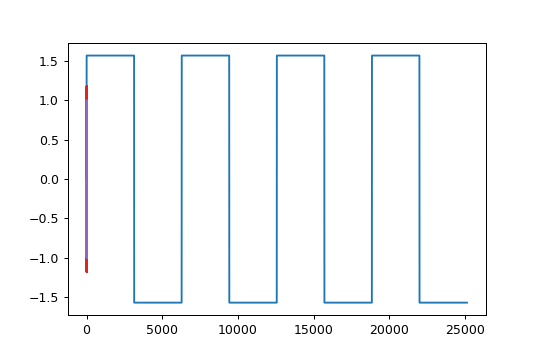

d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [102]:
f=1
T = 1.0 / 1000.0 # sample spacing
N=1000*8*np.pi
fs = 1/T #Hz
Ws = 2*np.pi/T
t = np.linspace(0,N*T,N)
print(t)
sqwave = np.sign(np.sin(t)) 
fig, ax = plt.subplots()
ax.plot(t,sqwave)
y=[]
for n in range(len(t)):
    ak=np.sign(np.sin(t[n]))*np.exp(np.complex(0,-n*np.pi*2))
    y.append(ak)
fig, ax = plt.subplots()
y=np.array(y)
ax.plot(y/2*np.pi)

<IPython.core.display.Javascript object>


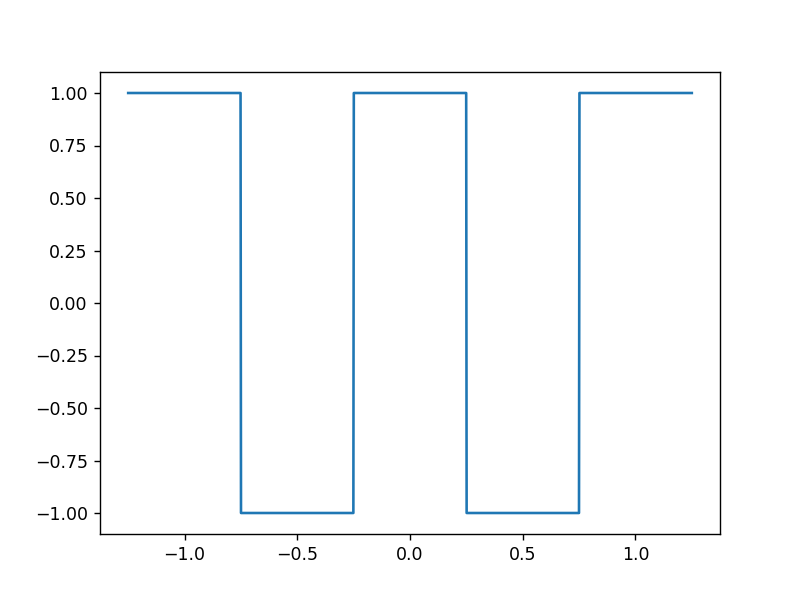

[   0.            1.59744409    3.19488818    4.79233227    6.38977636
    7.98722045    9.58466454   11.18210863   12.77955272   14.37699681
   15.97444089   17.57188498   19.16932907   20.76677316   22.36421725
   23.96166134   25.55910543   27.15654952   28.75399361   30.3514377
   31.94888179   33.54632588   35.14376997   36.74121406   38.33865815
   39.93610224   41.53354633   43.13099042   44.7284345    46.32587859
   47.92332268   49.52076677   51.11821086   52.71565495   54.31309904
   55.91054313   57.50798722   59.10543131   60.7028754    62.30031949
   63.89776358   65.49520767   67.09265176   68.69009585   70.28753994
   71.88498403   73.48242812   75.0798722    76.67731629   78.27476038
   79.87220447   81.46964856   83.06709265   84.66453674   86.26198083
   87.85942492   89.45686901   91.0543131    92.65175719   94.24920128
   95.84664537   97.44408946   99.04153355  100.63897764  102.23642173
  103.83386581  105.4313099   107.02875399  108.62619808  110.22364217
  111.8

<IPython.core.display.Javascript object>


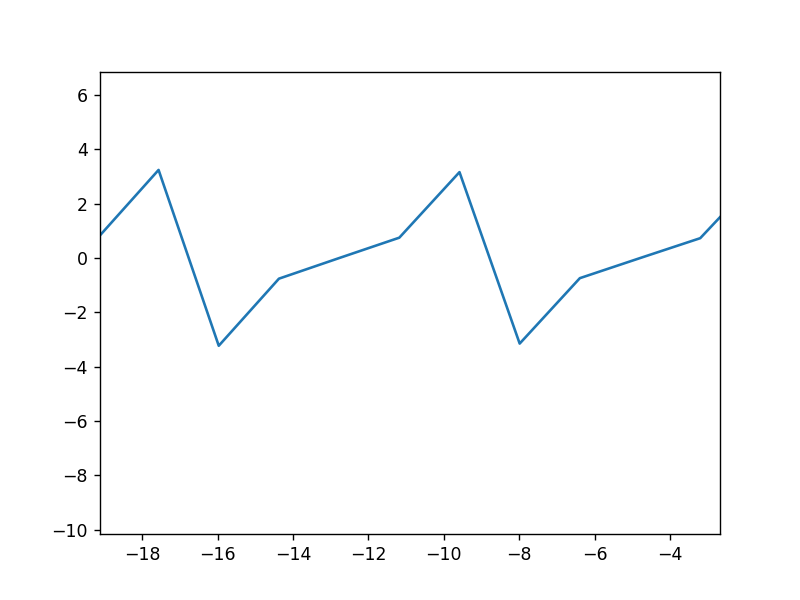

[ 1.19998762 -0.0102651  -1.19999076 ...  0.01525699 -1.19993603
 -0.0102651 ]


d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [33]:
%matplotlib notebook
f=1
T = 1.0 / 1000.0 # sample spacing
N=1250
t = np.linspace(-N*T,N*T,N)
sqwave = np.sign(np.cos(2*np.pi*f*(t)))
plt.plot(t,sqwave)

yf = np.fft.rfft(sqwave)

yf = np.fft.fftshift(yf)
freq = np.fft.fftfreq(len(yf))/T
print(freq)
fig, ax = plt.subplots()
#plt.xlim(-10*np.pi/2,10*np.pi/2)
ax.plot(freq, yf)
#
yf=np.fft.irfft(yf)
print(yf)
xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N*2)  #can't figure out the meaning of this constants
#xf=np.arange(len(yf))


In [16]:
import math

def iexp(n):
    return complex(math.cos(n), math.sin(n))
def dft(xs):
    "naive dft"
    n = len(xs)
    return [sum((xs[k] * iexp(-2 * math.pi * i * k / n) for k in range(n)))
            for i in range(n)]

<IPython.core.display.Javascript object>


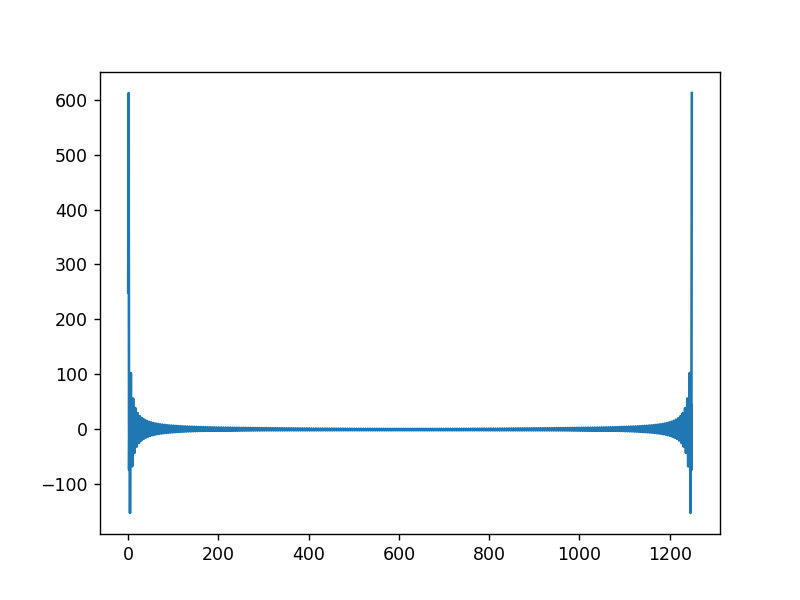

d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [19]:
f=1
T = 1.0 / 1000.0 # sample spacing
N=1250
t = np.linspace(0,N*T,N)
sqwave = np.sign(np.sin(2*np.pi*f*t)) 
fig, ax = plt.subplots()
ax.plot(dft(sqwave))


In [34]:
f=1
T = 1.0 / 1000.0 # sample spacing
N=1250
t = np.linspace(0,N*T,N)
sqwave = np.sign(np.cos(2*np.pi*f*t)) 
def get_freq(n):
    return np.array([(np.pi/n)*k for k in range(0,n)])


def my_dft(xn,n):
    return np.array([sum(xn[i]*np.exp(np.complex(0,(-2*np.pi/n)*k*i)) for i in range(n)) for k in range(n)])

In [35]:
print(my_dft(sqwave,N))

[250.          +0.j         611.1663621 +446.38949476j
 -71.15187903-222.78719279j ...  49.29746878+147.91778201j
 -71.15187903+222.78719279j 611.1663621 -446.38949476j]


<IPython.core.display.Javascript object>


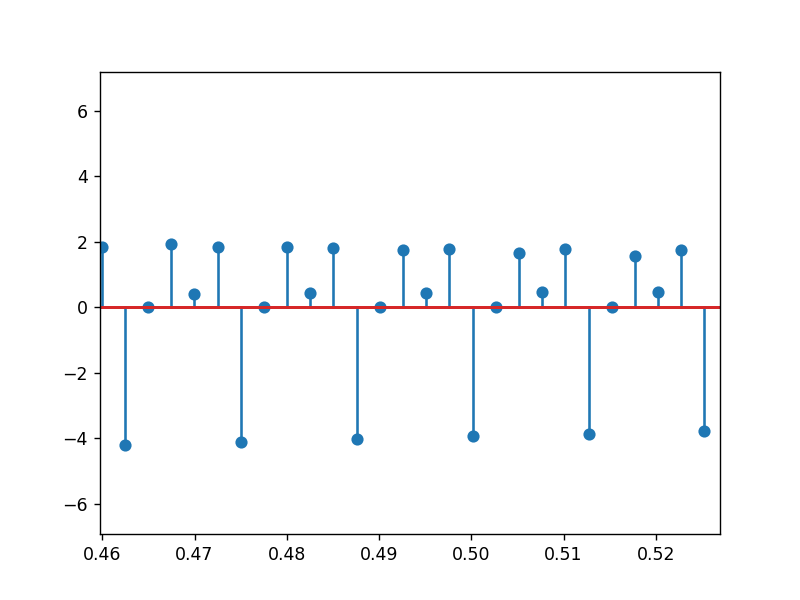

d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

In [37]:
fig, ax = plt.subplots()
ax.stem(get_freq(N),my_dft(sqwave,N))

[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]


<IPython.core.display.Javascript object>


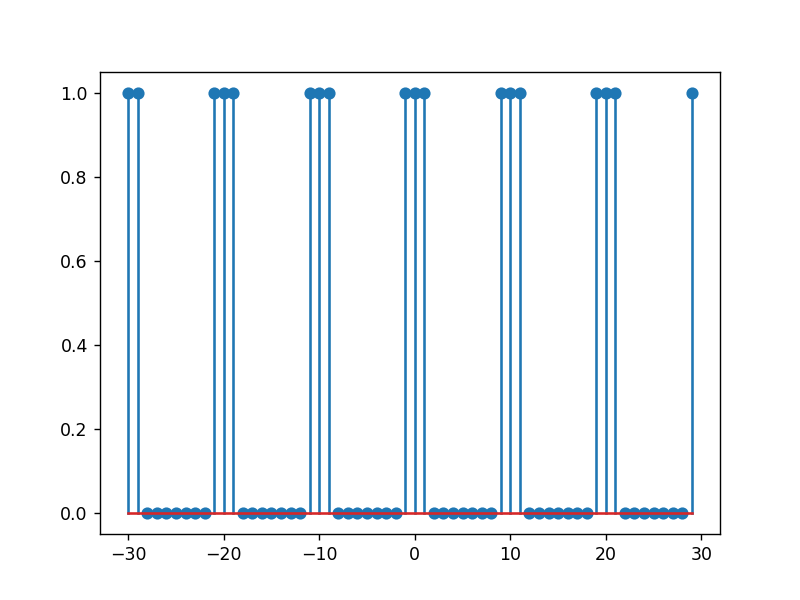

range(-30, 30)


d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


In [85]:
N = 10
M = 3
n = range(-30,30)
sqr = lambda x:1 if 0<=(x+M/2)%N<=M else  0

c0 = [sqr(i) for i in n]
print(c0)
fig, ax = plt.subplots()
ax.stem(n,c0)


print(n)

In [1]:
k = np.array(range(-10,11))
ak = lambda k: np.sin((2*np.pi*k/N)*(M+0.5))/(N*np.sin((2*np.pi*k)/(2*N))) if k%N!=0 else (2*M+1)/N

C0 = [ak(i) for i in k]


fig, ax = plt.subplots()
ax.stem(k,C0,markerfmt='D')


NameError: name 'np' is not defined

In [4]:
window = signal.triang(1)
print(window)

[1.]


<IPython.core.display.Javascript object>


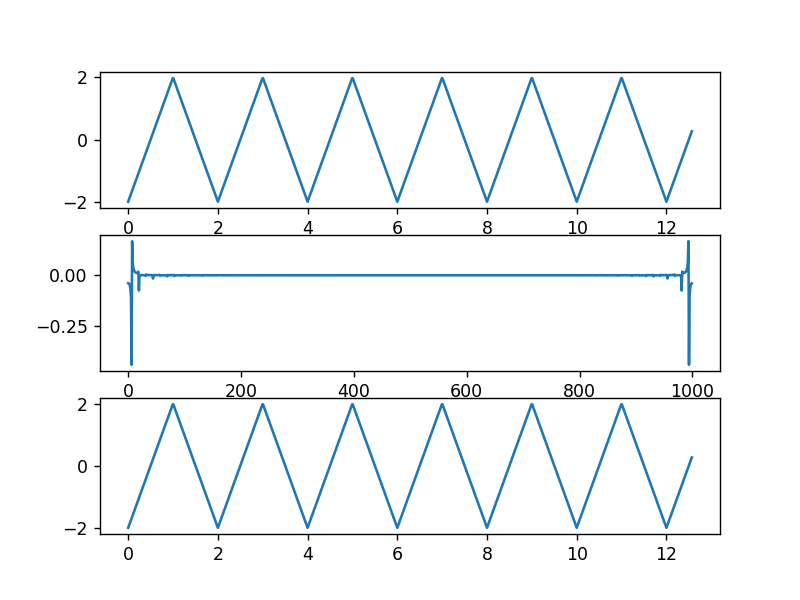

d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [31]:
t = np.linspace(0, 4*np.pi, 1000)

triangle = [2*signal.sawtooth( np.pi * i, 0.5) for i in t]




tri = lambda t: (signal.sawtooth(2 * np.pi *(1/w0) * t, 0.5)+1)/2 if t%(2*np.pi)<=w0 else 0
mtri = [tri(i) for i in t]
fig,ax = plt.subplots(3)
ax[0].plot(t,triangle)
i=np.fft.ifft(triangle)
ax[1].plot(i)
ax[2].plot(t,np.fft.fft(i))

In [4]:
tr = lambda x: max((w0-abs(x))/w0,0)

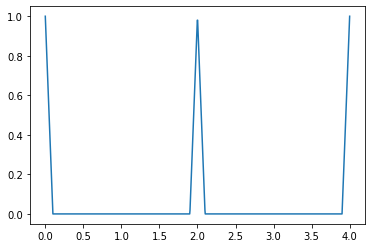

In [5]:
w0=0.1*np.pi
mtri = [tr(i-2*np.pi*round(i/(2*np.pi))) for i in t]
#print([i%(np.pi) for i in t])
plt.plot(t/np.pi,mtri)

NameError: name 'Y' is not defined

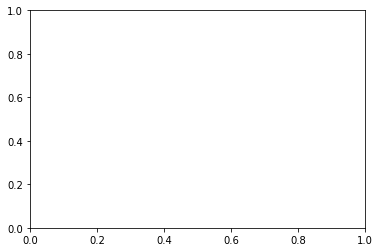

In [6]:
t = np.linspace(0, 4*np.pi, 500)

w0 = 0.2*np.pi
tr = lambda x: max((w0-abs(x))/w0,0)
N=10
M=2
ak = lambda k: np.sin((2*np.pi*k/N)*(M+0.5))/(N*np.sin((2*np.pi*k)/(2*N))) if k%N!=0 else (2*M+1)/N
k = np.array(range(-10,11))
fig, ax = plt.subplots()
ax.plot(t/np.pi,Y)


<class 'numpy.ndarray'>


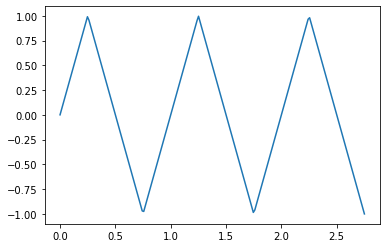

In [95]:
import math
t=np.linspace(0,2.75,201)
print(type(t))
tri =lambda t: 4*(t-1/2*math.floor(2*t+0.5))*(-1)**(math.floor(2*t+0.5))

te = [tri(i) for i in t]
plt.plot(t,te)



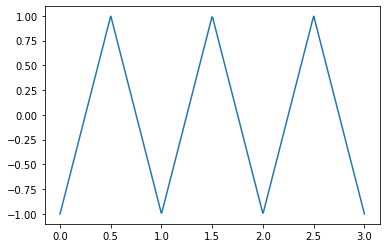

In [97]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 3, 500)
triangle = signal.sawtooth(2 * np.pi  * t, 0.5)
plt.plot(t, triangle)

interactive(children=(FloatSlider(value=0.0, description='n', max=14.0, step=2.0), Output()), _dom_classes=('w…

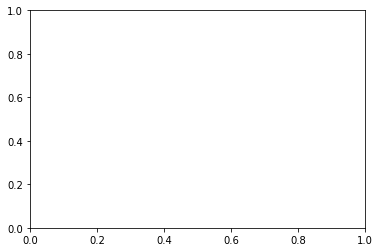

In [7]:
@interact
def fs(n=FloatSlider(min=0,max=14,step=2,value=0)):
    n = int(n)
    sq = np.zeros(len(t)) #preallocate the output array
    for h in np.arange(1,n,2):
        sq += (-1)**((h-1)/2)*np.sin(2*np.pi*h*(t+0.75))/h**2
    fig, ax = plt.subplots()
    ax.plot(t,(8/np.pi**2)*sq, t,triangle)
    ax.grid(True, which='both')

In [17]:
from IPython.display import Audio
y=np.sin(np.linspace(0, stop=5000, num=40000))

Audio(y, rate=20000)

<IPython.core.display.Javascript object>


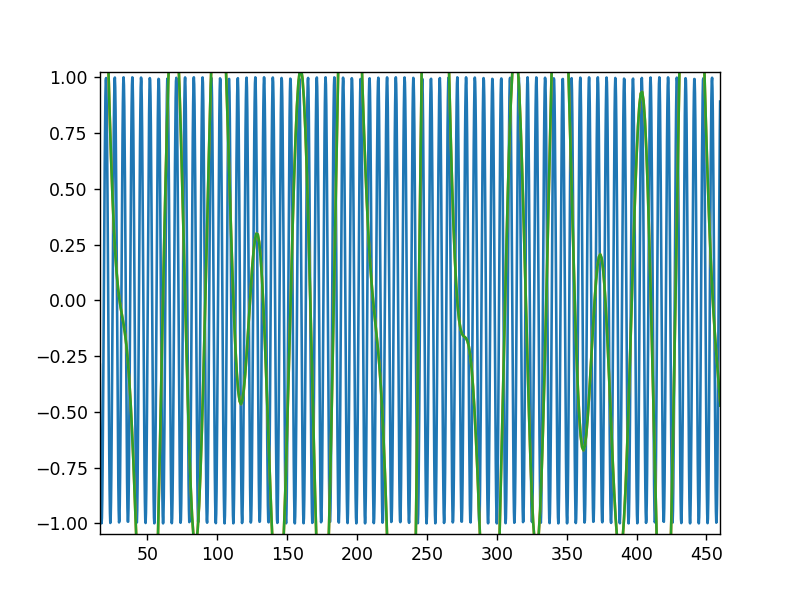

In [16]:
%matplotlib notebook
plt.plot(np.linspace(0, stop=5000, num=40000),y)

In [45]:
def synth(f):
    x = np.sin(f * 2. * np.pi * t)
    #display(Audio(x, rate=rate, autoplay=True))
    return x


rate = 48000.
duration = 1
t = np.linspace(
    0., duration, int(rate * duration))
y = synth(195.998)
triangle = signal.sawtooth(2 * np.pi  *195.998* t,1)
y1=synth(261.626)
y2=synth(329.628)
y3=synth(523.251)

#y = synth(195.998)+synth(523.251)+synth(261.626)+synth(329.628)
#y=signal.square(2 *440* np.pi  *t)

display(Audio(y, rate=rate, autoplay=True))


In [18]:
len(y)

192000

<IPython.core.display.Javascript object>


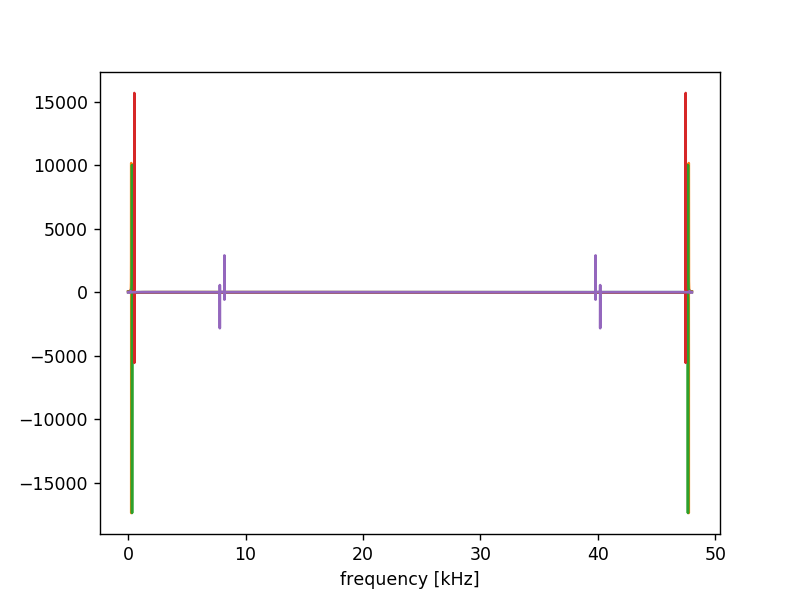

48000


d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [28]:
%matplotlib notebook
t4 = np.linspace(
    0., duration, int(rate * duration))
cos1 = np.cos(2*np.pi*4000*t4)
ax_freq = np.arange(0,rate,rate/len(y))*1e-3
plt.plot(ax_freq,np.fft.fft(y))
plt.plot(ax_freq,np.fft.fft(y1))
plt.plot(ax_freq,np.fft.fft(y2))
plt.plot(ax_freq,np.fft.fft(y3))
#plt.plot(ax_freq,np.fft.fft(np.multiply(y,cos1)))
plt.xlabel("frequency [kHz]")
print(len(ax_freq))
#y_out = np.multiply(y,cos1)
#y_in = np.multiply(y_out,cos1)
plt.plot(ax_freq,np.fft.fft(y_in))

#display(Audio(np.multiply(y,cos1), rate=rate, autoplay=True))

In [31]:
rate = 44100.
duration = 0.25
t = np.linspace(
    0., duration, int(rate * duration))

@interact
def tooth(v=(0,1,0.001),freq=(100,1000)):
    triangle = signal.sawtooth(2 * np.pi  *freq* t,v)
    display(Audio(triangle, rate=rate))
    ax_freq = np.arange(0,rate,rate/len(triangle))*1e-3
    #plt.plot(t,triangle)
    plt.plot(ax_freq,np.fft.fft(triangle))
    plt.xlim(0,0.05)

interactive(children=(FloatSlider(value=0.0, description='v', max=1.0, step=0.001), IntSlider(value=550, descr…

In [43]:
class Modulator:
    def __init__(self,modulation):
        self.modulation = modulation # a modulation function that depends on source index, source and time
    def modulate_source(self,num_of_sources, sources_array,time):
        output = np.zeros(len(time))
        for i in range(num_of_sources):
            output += self.modulation(i,sources_array[i],time)
        return output
    def reverse_modulation(self,index, source,time):
        return self.modulation(index,source,time)

In [44]:
cos_modulation = lambda i,src,t: np.multiply(np.cos(2*np.pi*4000*i*t),src)

In [46]:
cosModulator = Modulator(cos_modulation)
y = cosModulator.modulate_source(4,[y,y1,y2,y3],t)

<IPython.core.display.Javascript object>


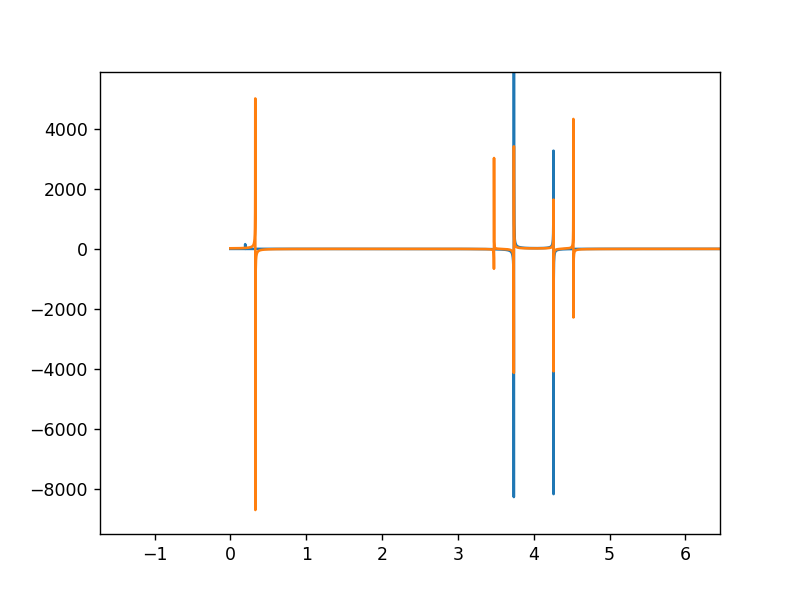

d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [47]:
fig,ax = plt.subplots()
ax.plot(ax_freq,np.fft.fft(y))

In [48]:
y = cosModulator.reverse_modulation(2,y,t)

In [49]:
ax.plot(ax_freq,np.fft.fft(y))

d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([ 0.        ,  0.051218  , -0.145441  , ..., -0.99340028,
       -0.93988524, -0.43186444])

In [12]:
x, sr = librosa.load('signal_1.wav',sr=None)
x1, sr1 = librosa.load('signal_2.wav',sr=None)
x2, sr2 = librosa.load('signal_3.wav',sr=None)
print(type(x))
print(len(x1))
print(len(x2))

<class 'numpy.ndarray'>
82263
82475


In [14]:
print(sr)
print(sr1)
print(sr2)
sr*1.5

44100
44100
44100


66150.0

In [20]:
duration = 1.5
out2 = x2[:int(sr*duration)]
display(Audio(out2, rate=sr, autoplay=True))
len(out)

66150

In [21]:


librosa.output.write_wav('signal_cut.wav', out, sr)



librosa.output.write_wav('signal_cut1.wav', out1, sr)



librosa.output.write_wav('signal_cut2.wav', out2, sr)



In [24]:
x, sr = librosa.load('signal_cut.wav',sr=None)
display(Audio(x, rate=sr, autoplay=True))
len(x)

66150

1.5
44100


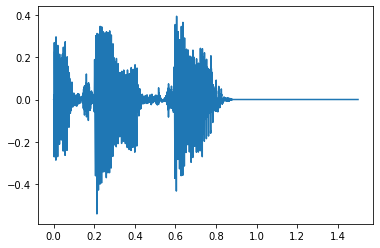

In [28]:
duration=len(x)/sr
print(duration)
print(sr)
t=np.linspace(0,duration,int(sr*duration))
plt.plot(t,x)

<IPython.core.display.Javascript object>


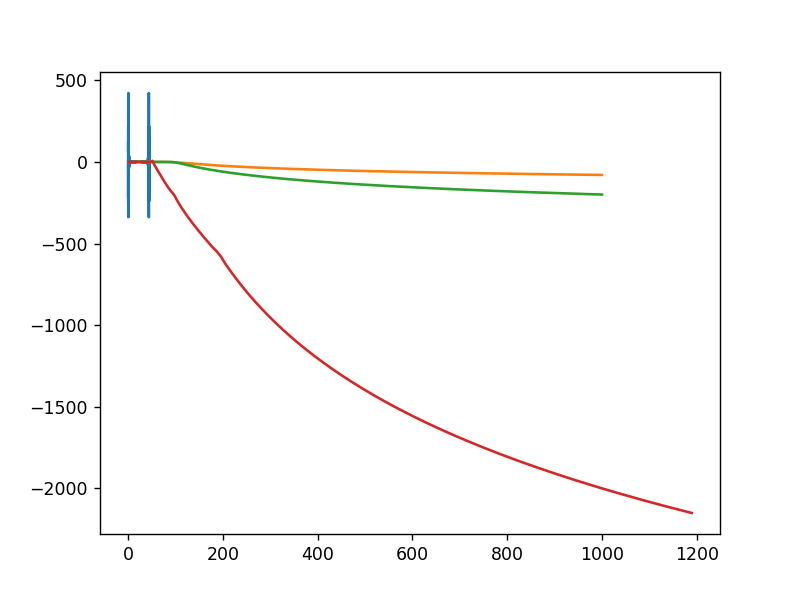

d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [31]:
%matplotlib notebook
ax_freq = np.arange(0,sr,sr/len(x))*1e-3
plt.plot(ax_freq,np.fft.fft(x))

In [16]:
b, a = signal.butter(100, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))

d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\polynomial.py:736: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]
d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\polynomial.py:736: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]
d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\scipy\signal\filter_design.py:189: RuntimeWarning: invalid value encountered in true_divide
  h = polyval(b, s) / polyval(a, s)


Lines(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([1.00000000e+00, 1.04737090e+00, 1.09698580e+00, 1.14895100e+00,
       1.20337784e+00, 1.26038293e+00, 1.32008840e+00, 1.38262217e+00,
       1.44811823e+00, 1.51671689e+00, 1.58856513e+00, 1.66381689e+00,
       1.74263339e+00, 1.82518349e+00, 1.91164408e+00, 2.00220037e+00,
       2.09704640e+00, 2.19638537e+00, 2.30043012e+00, 2.40940356e+00,
       2.52353917e+00, 2.64308149e+00, 2.76828663e+00, 2.89942285e+00,
       3.03677112e+00, 3.18062569e+00, 3.33129479e+00, 3.48910121e+00,
       3.65438307e+00, 3.82749448e+00, 4.00880633e+00, 4.19870708e+00,
       4.39760361e+00, 4.6059220

Figure(animation_duration=1000, axes=[Axis(label='x', scale=LinearScale()), Axis(label='y', orientation='verti…

interactive(children=(Dropdown(description='shape', options=('triangle', 'square'), value='triangle'), IntSlid…

Figure(animation_duration=1000, axes=[Axis(label='x', scale=LinearScale()), Axis(label='y', orientation='verti…

In [3]:
x, sr = librosa.load('signal_cut.wav',sr=None)
display(Audio(x, rate=sr, autoplay=True))
len(x)

66150

In [9]:
k=2

x = np.delete(x, np.arange(0, x.size, k))
len(x)

33075

In [10]:
def drop_every_kth(k,x):
    return np.delete(x, np.arange(0, x.size, k))


In [11]:
k=1
x=np.insert(x, range(0, len(x), k), 0) 
len(x)

66150

In [12]:
def zero_padding(k,x):
    return np.insert(x, range(0, len(x), k), 0) 

In [4]:
h0 = signal.cheby1(31,5, sr/2, 'lowpass', fs=sr,output='sos')
h1 = signal.cheby1(31,5, sr/2, 'highpass', fs=sr,output='sos')


ValueError: Digital filter critical frequencies must be 0 < Wn < 1

In [14]:
r0=signal.sosfilt(h0, x)
r1=signal.sosfilt(h1, x)
x0 = drop_every_kth(2,r0)
x1 = drop_every_kth(2,r1)
g0 = zero_padding(1,x0)
g1 = zero_padding(1,x1)

y0=signal.sosfilt(h0, g0)
y1=signal.sosfilt(h0, g1)

Y=y0+y1

<IPython.core.display.Javascript object>


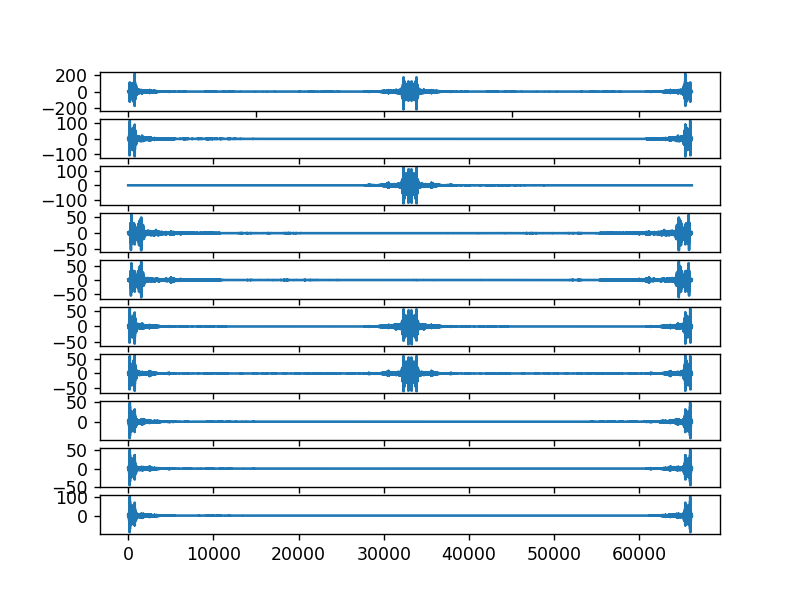

d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [23]:
fig,ax = plt.subplots(10)
ax_freq = np.arange(0,sr,sr/len(x))*1e-3
ax[0].plot(ax_freq,np.fft.fft(x))
ax[1].plot(np.fft.fft(r0))
ax[2].plot(np.fft.fft(r1))
ax[3].plot(np.fft.fft(x0))
ax[4].plot(np.fft.fft(x1))
ax[5].plot(np.fft.fft(g0))
ax[6].plot(np.fft.fft(g1))
ax[7].plot(np.fft.fft(y0))
ax[8].plot(np.fft.fft(y1))
ax[9].plot(np.fft.fft(Y))

In [16]:
t=range(0,50)
t1=range(0,50,2)
index_begin = 5000
index_end = 5050

<IPython.core.display.Javascript object>


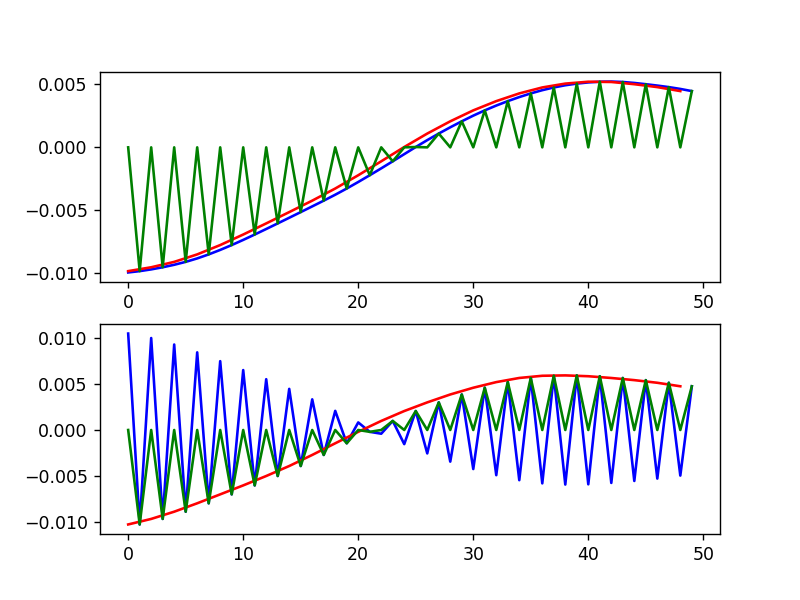

In [22]:
%matplotlib notebook
fig,ax = plt.subplots(2)
ax[0].plot(t,r0[index_begin:index_end],color = "blue")
ax[0].plot(t1,x0[2500:2525],color = "red")
ax[0].plot(t,g0[index_begin:index_end],color = "green")

ax[1].plot(t,r1[index_begin:index_end],color = "blue")
ax[1].plot(t1,x1[2500:2525],color = "red")
ax[1].plot(t,g1[index_begin:index_end],color = "green")

<IPython.core.display.Javascript object>


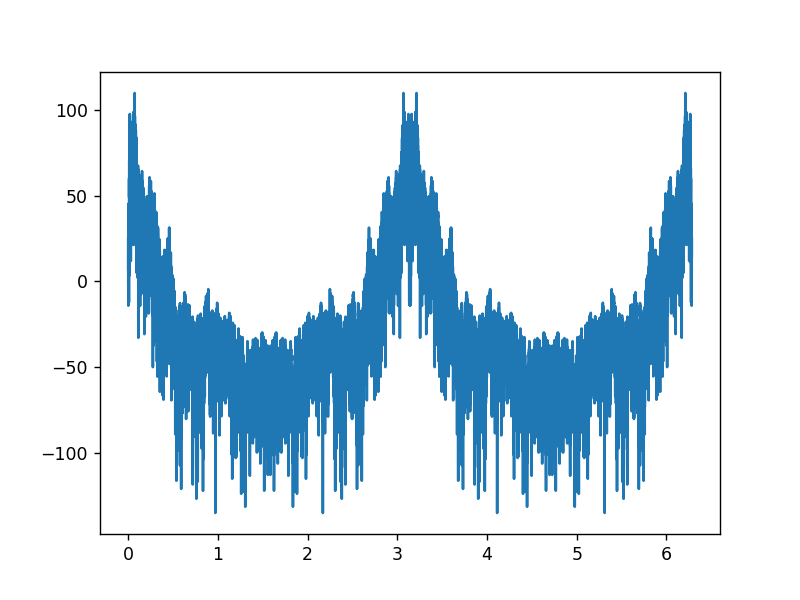

In [28]:
ax_freq = np.arange(0,2*np.pi,2*np.pi/len(x))
fig,ax=plt.subplots()
ax.plot(ax_freq,20*np.log(abs(np.fft.fft(x))))

X,r0,r1 - freq

x0,x1 - freq

g0,g1 -freq

y0,y1,y-freq

r0,x0,g0-time

r1,x1,g1 - time


